# Uniform Convergence

## $n$ as a term in the denominator an in the numerator

Uniform convergence for a sequence of functions $\{f_{n}\}_{n=1}^{\infty}$ gives us the ability to identify, for a given $\epsilon$, the $K \in \mathbb{N}$ at which &mdash;and beyond&mdash; the sequence converges, for every $x$ in the domain of the function. By Bartle p.243, with some arbitrarily small $\epsilon$ given, the sequence is uniformly convergent to function $f$, for any $x$ in the domain, if there exists some $K \in \mathbb{N}$ such that for all $n \geq K$ we have  

<h1><center>
    $\lvert f_{n} - f \rvert < \epsilon$
    </center></h1>

### Our functions:

<h1><center>
    $f_{n}(x) = x + \dfrac{1}{n}$
    </center></h1>
    
which converges to $f(x) = x$. Because we wish to eventually see a figure rendered through ```matplotlib```, which will be delayed by some amount of time due to limitations in the computational power of the machine, we set some limitations for $x$ and $\epsilon$ as the program prompts. Failing to comply with these limitations will kick us out of the program. We believe the space provided for each of these variables is large enough to acheive its goal. The following line gives us the condition we need to evaluate as True for uniform convergence:

```python
if abs(1/n) < epsilon:
```

which of course is the same as 

```python
if abs(x + 1/n - x) < epsilon:
```

Once the condition evaluates to True, the program plots the graph, giving us the value $K \in \mathbb{N}$ at which &mdash;and beyond, of course&mdash; the difference falls below $\epsilon$. The dots that appear on the graph are the absolute value differences we desire to observe below the threshold $\epsilon$.

 2022-05-29 11:43:43,254 - DEBUG - Start of program



Choose a real number x between 2/10 and 1, or press the return key to quit: 0.4
Choose a small number epsilon, between 1/100 and 1/10, or press the return key to quit: 0.07


 2022-05-29 11:44:02,238 - DEBUG - update_title_pos
 2022-05-29 11:44:03,236 - DEBUG - update_title_pos
 2022-05-29 11:44:03,398 - DEBUG - update_title_pos
 2022-05-29 11:44:03,518 - DEBUG - update_title_pos


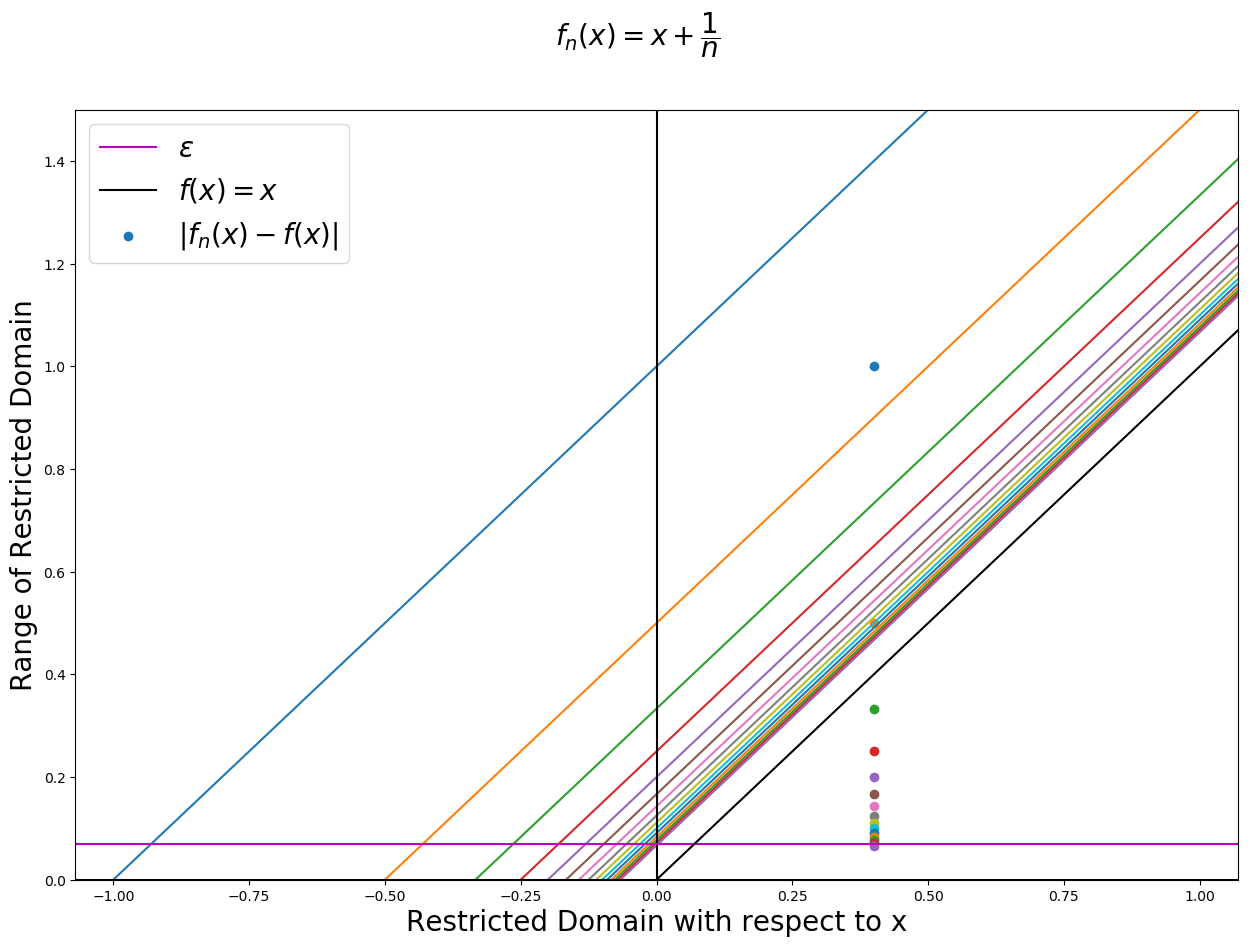


The number of functions on the graph: 15


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s'
    ' - %(message)s')
logging.getLogger('matplotlib.font_manager').disabled = True

logging.debug('Start of program' + f'\n')


def x_plus_one_over_n():
    """This function plots each function $f_{n}(x)$, from a sequence of
functions \{f_{n}\}_{n=1}^{\infty}, each with a doman and codmain of real
numbers, from n=1 up to whatever value of n is required for the if conditional
to evaluate True. Once the if conditional evaluates True, the function stores
the number of natural numbers, n=K, for such an evaluation to be reached.
This sequence of functions converges uniformly to f=x, on (-\infty, \infty)"""
    
    # User input for x
    flag = True
    while flag:
        # We take care of those scenarios when user input is the return key
        x_input = input('Choose a real number x between 2/10 and 1,'
            ' or press the return key to quit: ')
        if not x_input:
            return 'Okay. Goodbye'
        
        # We take care of those scenarios when user input is non-numerical
        try:
            x = float(x_input)
            flag = False
        except ValueError:
            logging.debug('Really must type in a numerical value.' + f'\n')
            continue 
    
    # User input for epsilon
    flag = True
    while flag:
        # We take care of those scenarios when user input is the return key
        epsilon_input = input('Choose a small number epsilon, between 1/100' 
            ' and 1/10, or press the return key to quit: ')
        if not epsilon_input:
            return 'Okay. Goodbye'
        
        # We take care of those scenarios when user input is non-numerical
        try:
            epsilon = float(epsilon_input)
            flag = False
        except ValueError:
            logging.debug('Really must type in a numerical value.' + f'\n')
            continue
    
    
    # When user input for x is out of specified range
    if x < 0.2 or x > 1:
        logging.debug(f'Your value x={x} is not in the requested'
            ' range' + f'\n')
        return 'Goodbye'
    
    # When user input for epsilon is out of specified range
    if epsilon < 1/100 or epsilon > 1/10:
        logging.debug(f'Your value epsilon={epsilon} is not in the' 
            ' requested range' + f'\n')
        return 'Goodbye'
    
    # The statement below begins to assemble our figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Vector u is what defines our restricted domain of each function
    # with respect to x
    u = np.linspace(-1000, 1000, 1000)
    
    # We initiate the index n with a value of 1 to simulate a
    # mathematical sequence
    n = 1
    
    # Vector v will serve as the range of our restricted domain defined by
    # vector u
    v = u + (1/n)
    
    # We plot this first vector pair u and v, as well as the 
    # absolute value of the difference of f_n(x)-f(x), where f_n(x) is the
    # function from our sequence at n=1 and f(x) is the function to which the
    # sequence of functions uniformly converges.
    ax.plot(u, v)
    ax.scatter(x, (1/n), label=r'$| f_n(x) - f(x) |$')
    
    flag = True
    while flag:
        if abs(1/n) < epsilon:
            
            # Completing the plot
            ax.axvline(x=0, c='k')
            ax.axhline(y=0, c='k')
            ax.axhline(y=epsilon, c='m', label=r'$\epsilon$')
            ax.plot(u, u, c='k', label=r'$f(x)=x$')
            plt.xlabel('Restricted Domain with respect to x', fontsize=20)
            plt.xticks(fontsize=10)
            plt.ylabel('Range of Restricted Domain',
                fontsize=20)
            plt.yticks(fontsize=10)
            plt.ylim(0, 1.5)
            plt.xlim(-1 - epsilon, 1 + epsilon)
            fig.suptitle(r'$f_{n}(x) = x + \dfrac{1}{n}$', fontsize=20)
            plt.legend(prop={'size':20})
            plt.show()
            
            flag = False
        else:
            
            # We increase our index by 1
            n += 1
            
            # We keep the same restricted domain with vector u, but our
            # range with this new vector v will change, since n has changed
            v = u + (1/n)
            
            # We plot the next vector pair u and v in the same plot as the
            # preceding vector pairs, as well as the absolute value of the
            # difference of f_n(x)-f(x), where f_n(x) is the
            # function from our sequence at n=k and f(x) is the function to
            # which the sequence of functions uniformly converges.
            ax.plot(u, v)
            ax.scatter(x, (1/n))
            
    return f'\nThe number of functions on the graph: {n}'
            

print(x_plus_one_over_n())
    
    
    
